In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [114]:
cd '/content/drive/My Drive/Colab Notebooks/kaggle/kaggle_digit_recognizer'

/content/drive/My Drive/Colab Notebooks/kaggle/kaggle_digit_recognizer


In [0]:
df = pd.read_csv('train.csv')

In [0]:
# df.head()

In [0]:
pic = list(df.iloc[11219][df.columns[1:]])

In [0]:
pic = np.reshape(pic, (28,28))

In [119]:
pic.max()

255

In [120]:
pic.min()

0

In [0]:
pic = pic/255

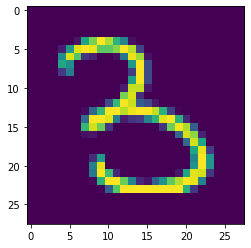

In [122]:
plt.imshow(pic)

In [0]:
x  = []
y  = []

In [124]:
len(df)

42000

In [0]:
feature = list(df.columns[1:])
label = df.columns[0]

In [0]:
#plt.imshow(np.reshape(list(df.iloc[10][feature]), (28,28))) 

In [127]:
with tf.device('/device:GPU:0'):
  for i in range(len(df)):
      if i %1000 ==0: 
          print(i)
      curr = df.iloc[i]
      dp = list(curr[feature])
      shape = (28,28,1)
      x.append(np.reshape(dp,shape))
      y.append(curr[label])   
      

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000


In [0]:
# plt.imshow(x[0])

In [0]:
# y

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=37)

In [0]:
def bin_arr(arr, limit): #to make each cell either 0 or 1
  for i in range(len(arr)): 
    for r in range(len(arr[i])):
      for c in range(len(arr[i][0])):
        if arr[i][r][c] >= limit:
          arr[i][r][c] =1
        else:
          arr[i][r][c] =0
  return arr
    

In [0]:
limit = 0.5

In [0]:
X_train = bin_arr(X_train, limit)
X_test = bin_arr(X_test, limit)

In [0]:
X_train = np.reshape(X_train, (len(X_train),28,28,1) )

In [0]:
X_test = np.reshape(X_test, (len(X_test),28,28,1) )

In [0]:
y_train = np.reshape(y_train, (-1, 1))

In [137]:
y_train.shape

(29400, 1)

In [0]:
y_test = np.reshape(y_test, (-1,1))

In [139]:
y_train.min()

0

In [140]:
y_test.min()

0

In [0]:
y_cat_train = to_categorical(y_train, 10)

In [0]:
y_cat_test = to_categorical(y_test, 10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [0]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (2,2),strides = 1, padding = 'valid', input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (2,2),strides = 1, padding = 'valid', input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(filters = 32, kernel_size = (2,2),strides = 1, padding = 'valid', input_shape = (28,28,1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(filters = 16, kernel_size = (3,3),strides = 1, padding = 'valid', input_shape = (28,28,1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(filters = 8, kernel_size = (3,3),strides = 1, padding = 'valid', input_shape = (28,28,1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )



In [160]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 16)        4112      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               73856     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
es = EarlyStopping(monitor = 'val_loss', patience = 2)

In [163]:
with tf.device('/device:GPU:0'):
  model.fit(x = X_train, y = y_cat_train, epochs = 100 , validation_data=(X_test, y_cat_test)) #, callbacks = [es])

Epoch 1/100
919/919 [==============================] - 3s 4ms/step - loss: 0.3259 - accuracy: 0.8997 - val_loss: 0.1440 - val_accuracy: 0.9564
Epoch 2/100
919/919 [==============================] - 3s 3ms/step - loss: 0.1058 - accuracy: 0.9667 - val_loss: 0.1074 - val_accuracy: 0.9667
Epoch 3/100
919/919 [==============================] - 3s 4ms/step - loss: 0.0733 - accuracy: 0.9764 - val_loss: 0.0982 - val_accuracy: 0.9698
Epoch 4/100
919/919 [==============================] - 3s 4ms/step - loss: 0.0540 - accuracy: 0.9821 - val_loss: 0.0658 - val_accuracy: 0.9780
Epoch 5/100
919/919 [==============================] - 3s 4ms/step - loss: 0.0419 - accuracy: 0.9866 - val_loss: 0.0729 - val_accuracy: 0.9774
Epoch 6/100
919/919 [==============================] - 3s 4ms/step - loss: 0.0333 - accuracy: 0.9888 - val_loss: 0.0800 - val_accuracy: 0.9763
Epoch 7/100
919/919 [==============================] - 3s 4ms/step - loss: 0.0268 - accuracy: 0.9910 - val_loss: 0.0740 - val_accuracy: 0.9798

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('digit_recognizer_202020513_2330.h5')

In [0]:
metrics = pd.DataFrame(model.history.history)

In [167]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [168]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,3.258804e-01,0.899728,0.143958,0.956429
1,1.057935e-01,0.966667,0.107431,0.966746
2,7.326325e-02,0.976361,0.098186,0.969841
3,5.400870e-02,0.982143,0.065784,0.978016
4,4.192324e-02,0.986599,0.072853,0.977381
...,...,...,...,...
95,6.487580e-11,1.000000,0.195497,0.984127
96,6.487580e-11,1.000000,0.196858,0.984127
97,4.865685e-11,1.000000,0.198056,0.984286
98,3.649264e-11,1.000000,0.199460,0.984048


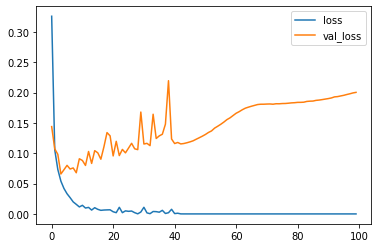

In [169]:
metrics[['loss', 'val_loss']].plot()

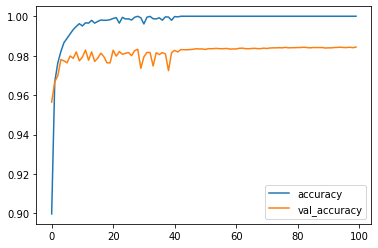

In [170]:
metrics[['accuracy', 'val_accuracy']].plot()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [172]:
predicts = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [173]:
print(classification_report(predicts, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1276
           1       0.99      0.99      0.99      1420
           2       0.99      0.98      0.99      1280
           3       0.97      0.99      0.98      1253
           4       0.98      0.99      0.99      1241
           5       0.98      0.99      0.98      1144
           6       0.99      0.99      0.99      1211
           7       0.98      0.99      0.99      1287
           8       0.98      0.97      0.98      1248
           9       0.98      0.98      0.98      1240

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



In [174]:
confusion_matrix(predicts, y_test)

array([[1252,    0,    3,    0,    0,    3,    8,    2,    4,    4],
       [   0, 1404,    3,    1,    1,    0,    0,    3,    5,    3],
       [   1,    3, 1260,    7,    1,    1,    0,    5,    0,    2],
       [   2,    2,    3, 1235,    0,    4,    0,    3,    3,    1],
       [   1,    2,    0,    0, 1225,    0,    1,    2,    3,    7],
       [   0,    0,    0,    9,    0, 1130,    2,    1,    0,    2],
       [   3,    0,    0,    1,    0,    6, 1194,    0,    6,    1],
       [   0,    1,    4,    0,    4,    1,    0, 1273,    0,    4],
       [   1,    1,    2,    8,    4,    4,    5,    1, 1216,    6],
       [   0,    0,    0,    6,   10,    2,    0,    3,    5, 1214]])

In [0]:
df = pd.read_csv('test.csv')

In [0]:
def bin_arr_line(arr, limit): #to make each cell either 0 or 1
  for i in range(len(arr)):
    if arr[i] >= limit:
      arr[i] =1
    else:
      arr[i] =0
  return arr
    

In [0]:
shape = (1,28,28,1)

array([6])

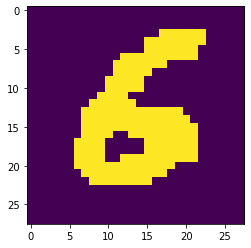

In [178]:
curr = df.iloc[917]
x = bin_arr_line(list(curr[feature]), 0.4)
plt.imshow(np.reshape(x, (28,28)))
x = np.reshape(x, shape)
model.predict_classes(x)


In [0]:
# f = open ('result.csv','w+')
# f.write('hello')
# f.close()

In [180]:
!pwd
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
#   print('and then re-execute this cell.')
# else:
#   print(gpu_info)

/content/drive/My Drive/Colab Notebooks/kaggle/kaggle_digit_recognizer


In [181]:
f = open ('result.csv','w+')
with tf.device('/device:GPU:0'):
  feature = list(df.columns) 
  shape = (1,28,28,1)
  for i in range(len(df)):
      curr = df.iloc[i]
      if i % 1000 ==0: print(i)
      x = bin_arr_line(list(curr[feature]), limit)
      x = np.reshape(x, shape)
      f.write(str(i+1)+','+str(model.predict_classes(x)[0]))
      f.write('\n')
f.close()


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000


In [182]:
pwd

'/content/drive/My Drive/Colab Notebooks/kaggle/kaggle_digit_recognizer'

In [183]:
ls -al

total 133109
-rw------- 1 root root   126178 May 13 19:37 digit_recognizer_20200513_1012.ipynb
-rw------- 1 root root    91680 May 14 03:46 digit_recognizer_20200513_2238.ipynb
-rw------- 1 root root   996232 May 14 03:35 digit_recognizer_202020513_2330.h5
-rw------- 1 root root  6981560 May 13 19:13 digit_recognizer.h5
-rw------- 1 root root   212894 May 14 03:47 result.csv
-rw------- 1 root root 51118296 May 13 00:29 test.csv
-rw------- 1 root root 76775041 May 13 00:29 train.csv
